# AI 520 : Final Project

Name: Lillian Nguyen
CWID: 56721

## Frame the Problem
 - Goal : Predict a tennis player's ATP Rank based on peformance features of Total Points, Grand Slam Points, Masters Points, Other Points, and Tournaments.
- Why it's valuable : Helps coaches, analysts, and fans understand how performance in different tournament categories impacts a player's ranking.

In [50]:
#loading libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## getting data

In [ ]:
#loading data
tennis_data = pd.read_csv("data/atp_ranking.csv")

#checking data
tennis_data.head()

,rank,player,country,total_points,grand_slam_points,masters_points,other_points,tournaments
0,1,"Alcaraz, Carlos",ESP,6820,2450,2740,1630,17
1,2,"Nadal, Rafael",ESP,6020,4180,890,950,14
2,3,"Ruud, Casper",NOR,5820,2400,1565,1855,23
3,4,"Tsitsipas, Stefanos",GRE,5550,910,3065,1575,23
4,5,"Djokovic, Novak",SRB,4820,360,1970,2490,14


## exploring data

In [ ]:
#quick overview
tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               1994 non-null   int64 
 1   player             1994 non-null   object
 2   country            1994 non-null   object
 3   total_points       1994 non-null   int64 
 4   grand_slam_points  1994 non-null   int64 
 5   masters_points     1994 non-null   int64 
 6   other_points       1994 non-null   int64 
 7   tournaments        1994 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 124.8+ KB


In [6]:
#summary statistics
tennis_data.describe()

,rank,total_points,grand_slam_points,masters_points,other_points,tournaments
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,991.473922,124.318455,17.227683,20.039117,87.051655,12.633902
std,567.965233,427.962906,144.030709,148.856907,202.015474,8.997930
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,499.250000,2.000000,0.000000,0.000000,2.000000,5.000000
50%,997.500000,11.000000,0.000000,0.000000,11.000000,11.000000
75%,1491.000000,72.000000,0.000000,0.000000,72.000000,21.000000
max,1994.000000,6820.000000,4180.000000,3065.000000,2510.000000,38.000000


In [7]:
#checking missing values
tennis_data.isnull().sum()

rank                 0
player               0
country              0
total_points         0
grand_slam_points    0
masters_points       0
other_points         0
tournaments          0
dtype: int64

## preparing data  

In [ ]:
#changing column name with lowercase
tennis_data.columns = tennis_data.columns.str.lower().str.replace(" ", "_")

#dropping unwanted columns
tennis_data = tennis_data.drop(columns=['player', 'country'])

#double checking for missing values
print("Missing Value Check\n", tennis_data.isnull().sum())

#drop missing values
tennis_data = tennis_data.dropna()

Missing Value Check
 rank                 0
total_points         0
grand_slam_points    0
masters_points       0
other_points         0
tournaments          0
dtype: int64


## exploring updated data (removed unwanted columns) with visuals

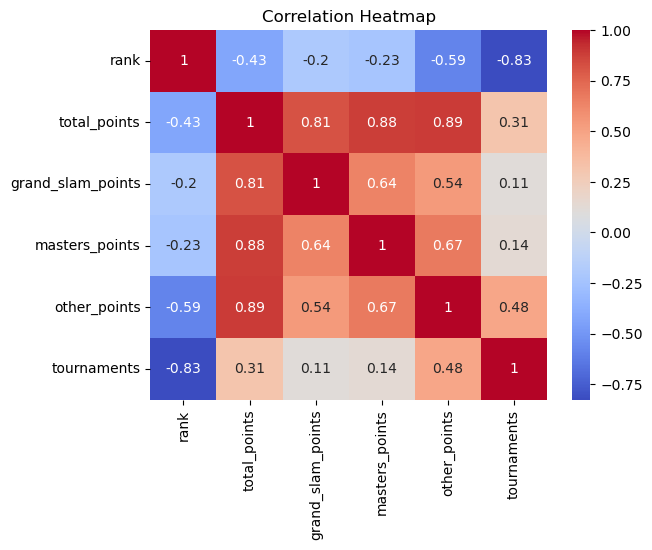

In [ ]:
#heatmap to show correlations
sns.heatmap(tennis_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

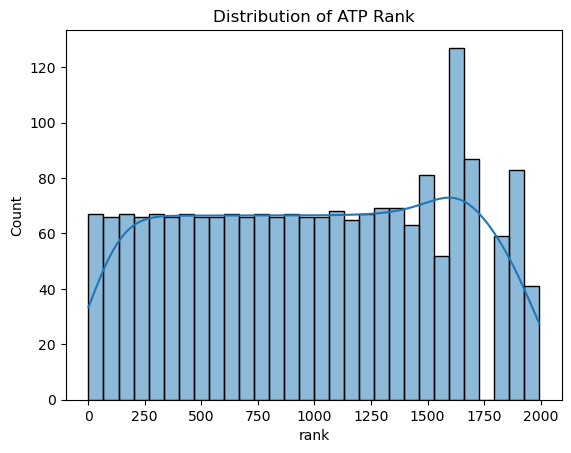

In [10]:
#distribution of rank
#to see how the rank are distributed

#histogram
sns.histplot(tennis_data['rank'], bins=30, kde=True)
plt.title("Distribution of ATP Rank")
plt.show()

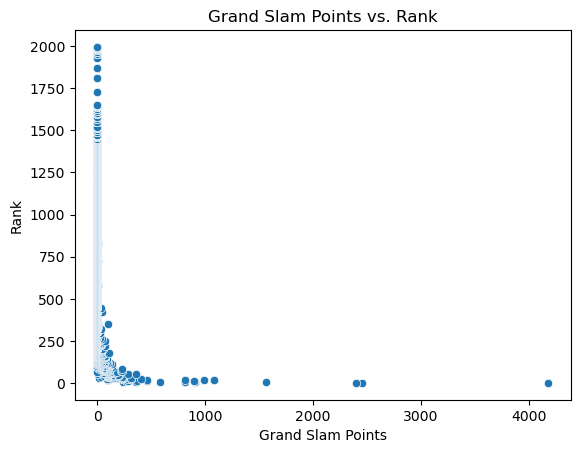

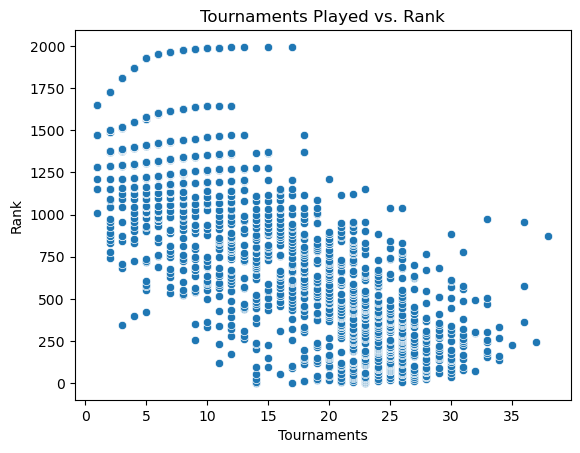

In [11]:
#scatterplots to explore relationships

#rank vs grand slam points 
sns.scatterplot(x='grand_slam_points', y='rank', data=tennis_data)
plt.title("Grand Slam Points vs. Rank")
plt.xlabel("Grand Slam Points")
plt.ylabel("Rank")
plt.show()

#rank vs tournaments
sns.scatterplot(x='tournaments', y='rank', data=tennis_data)
plt.title("Tournaments Played vs. Rank")
plt.xlabel("Tournaments")
plt.ylabel("Rank")
plt.show()

In [12]:
##### train & test data ##### 
############################# 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#features & target
X = tennis_data.drop(columns=['rank'])
y = tennis_data["rank"]

#scaling features to be on same range (important for linear models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split data into train and test sets using the scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, \nTesting Set: {X_test.shape}")

Training Set: (1595, 5), 
Testing Set: (399, 5)


## testing different training models to find the best fit

In [14]:
##### training model - linear regression ##### 
############################################## 

#scaled 
from sklearn.linear_model import LinearRegression

#creating model
linear_model = LinearRegression()

#fitting model
linear_model.fit(X_train, y_train)

#predictions
linear_y_pred = linear_model.predict(X_test)

#mse & r2 score performance 
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

print("Mean Squared Error:", linear_mse)
print("R^2 Score:", linear_r2)

Mean Squared Error: 78348.12344550382
R^2 Score: 0.7556256242834991


In [15]:
##### training model - random forest ##### 
############################################## 

#not scaled 
from sklearn.ensemble import RandomForestRegressor

#creating model
rf_model = RandomForestRegressor(random_state=42)

#fitting model
rf_model.fit(X_train,y_train)

#predicting
rf_y_pred = rf_model.predict(X_test)

#evaluating
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Mean Squared Error:", rf_mse)
print("R^2 Score:", rf_r2)

Mean Squared Error: 6.436886176626264
R^2 Score: 0.9999799228115264


In [16]:
##### training model - lasso regression ##### 
############################################## 

#scaled
from sklearn.linear_model import Lasso

#creating model
lasso_model = Lasso(alpha=0.1)

#fitting model
lasso_model.fit(X_train, y_train)

#predictions
lasso_y_pred = lasso_model.predict(X_test)

#evaluating
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print("Mean Squared Error:", lasso_mse)
print("R^2 Score:", lasso_r2)

Mean Squared Error: 78358.69948505734
R^2 Score: 0.755592636728089


Explained Variance Ratio: [0.67072024 0.20361823]
Cumulative Explained Variance: 0.8743384648326851


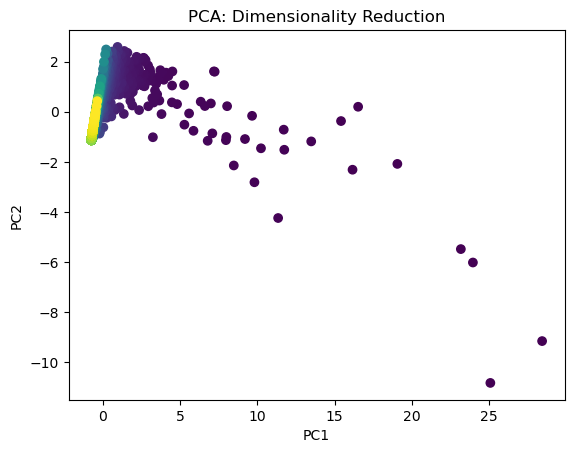

In [ ]:
### training model - pca for visualization ### 
############################################## 

#scaled 
from sklearn.decomposition import PCA

#creating pca object to reduce data into 2 features
pca = PCA(n_components=2)

#fitting pca to scaled data
X_pca = pca.fit_transform(X_scaled)

#printing explained varaince
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", sum(pca.explained_variance_ratio_))

#plotting PCA as scatter plot result in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA: Dimensionality Reduction")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

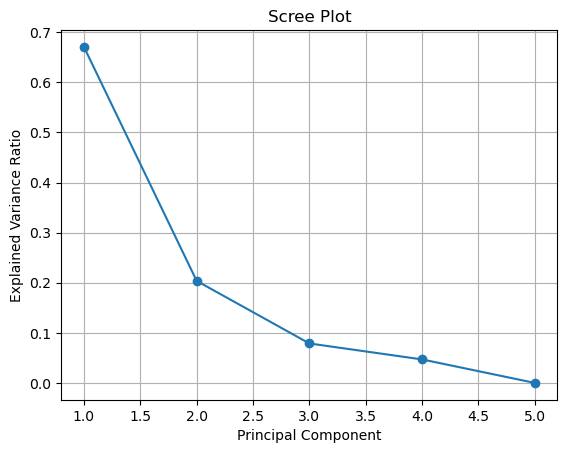

In [29]:
#plotting the scree line graph with pca
pca_full = PCA()
pca_full.fit(X_scaled)

explained_var = pca_full.explained_variance_ratio_

plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


## modeling results
The best model between the three models is Random Forest because of having the lowest mean squared error, the R2 score is the closest to 1 indicating that it has an almost perfect predictions, and does this model does not require scaling. While the other two models required scaling, and had close R2 score, it was not as close enough as the Random Forest model.

In [51]:
############# modeling results ############# 
############################################## 
 
print("#### Comparing the Trained Models ####")

#linear regression results 
print("\nLinear Regression")
print("Mean Squared Error:", linear_mse)
print("R^2 Score:", linear_r2)
print("Notes: This model's R2 score is the 3rd closest to 1, but not the best model to represent the results.")

#random forest results
print("\n***Random Forest")
print("Mean Squared Error:", rf_mse)
print("R^2 Score:", rf_r2)
print(f"Notes: Best model due to R2 score of {rf_r2} being the closest to 1 with the best overall performance. Also, having the lowest mean squared error score and not having to require a scaling.")

#lasso regression results
print("\nLasso Regression")
print("Mean Squared Error:", lasso_mse)
print("R^2 Score:", lasso_r2)
print("Notes: This model's R2 score is the 2nd clostest to 1, but still is not the best model to represent the data.")

#### Comparing the Trained Models ####

Linear Regression
Mean Squared Error: 78348.12344550382
R^2 Score: 0.7556256242834991
Notes: This model's R2 score is the 3rd closest to 1, but not the best model to represent the results.

***Random Forest
Mean Squared Error: 6.436886176626264
R^2 Score: 0.9999799228115264
Notes: Best model due to R2 score of 0.9999799228115264 being the closest to 1 with the best overall performance. Also, having the lowest mean squared error score and not having to require a scaling.

Lasso Regression
Mean Squared Error: 78358.69948505734
R^2 Score: 0.755592636728089
Notes: This model's R2 score is the 2nd clostest to 1, but still is not the best model to represent the data.


## Choosing the Model : Random Forest

In [ ]:
###### chosen model : random forest ####### 
############################################## 

#retrain with best parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#fitting model
rf_model.fit(X_train, y_train)

#predicting
rf_y_pred = rf_model.predict(X_test)

#evaluating
mse = mean_squared_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)


print("#### Chosen Model : Random Forest ####")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

#### Chosen Model : Random Forest ####
Mean Squared Error: 6.436886176626264
R^2 Score: 0.9999799228115264


## Fine Tuning Model : Random Forest

In [21]:
###### fine tuning random forest model ####### 
############################################## 
from sklearn.model_selection import GridSearchCV

#defining grid hyperparameters 
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth' : [None, 5, 10]
}

#creating gridsearchcv to test all comboinations 
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)

#fitting the grid for training data 
grid_search.fit(X_train, y_train)

#getting best performance model 
best_rf = grid_search.best_estimator_

#predicting with MSE and R2 results 
y_pred = best_rf.predict(X_test)
print("Tuned Random Forest MSE:", mean_squared_error(y_test, y_pred))
print("Tuned Random Forest R²:", r2_score(y_test, y_pred))

Tuned Random Forest MSE: 6.52946600992434
Tuned Random Forest R²: 0.9999796340472527


## visualizing results

/tmp/ipykernel_1046/1798866530.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


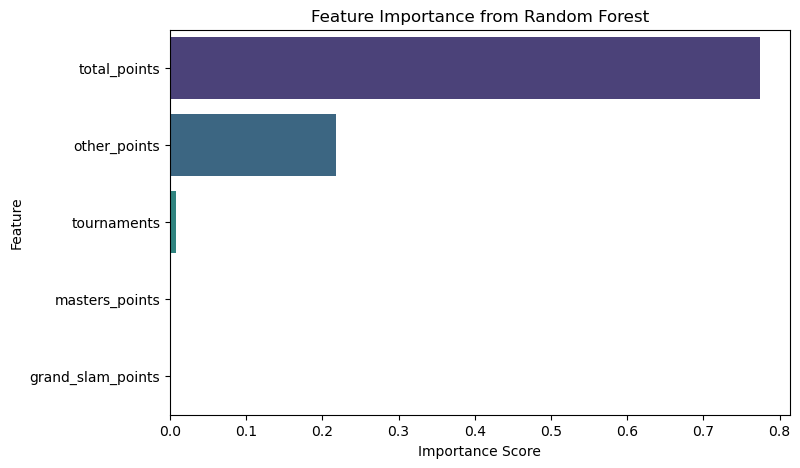

In [23]:
#bar graph to see the important features

#getting feature importance values from random forest model
feature_importances = best_rf.feature_importances_

#names of features 
features = X.columns

#dataframe to match each features 
importance_df = pd.DataFrame({
    'Feature': features, 
    'Importance': feature_importances})

#sorting features by importance score from high to low 
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#plotting bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

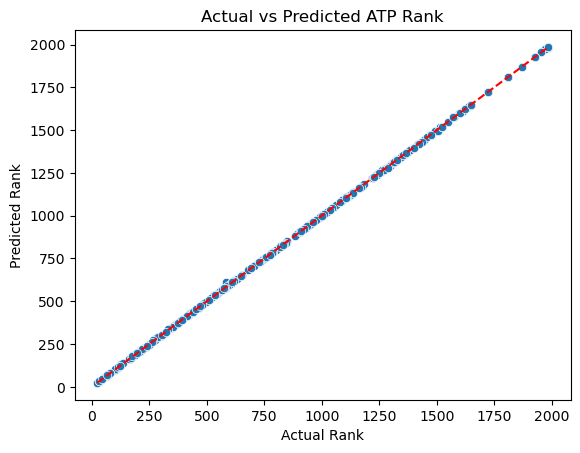

In [24]:
#actual vs predicted scatter plot for random forest
#getting trained random forest model to make predications for test
y_pred = best_rf.predict(X_test)

#plotting scatter plot 
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Rank")
plt.ylabel("Predicted Rank")
plt.title("Actual vs Predicted ATP Rank")
plt.show()


## Overall Results / Solution
Random Forest Accuracy & Prediction Outcome
- Initial Random Forest Model being tested as possible model use
    - Inital Mean Squared Error: 6.436886176626264
    - Inital R² Score: 0.9999799228115264
- Choosing Random Forest Model and fine tuning it
    - Tuned Random Forest MSE: 6.52946600992434
    - Tuned Random Forest R² Score: 0.9999796340472527

Explanation For Accuracy & Prediction Outcome
- The initial MSE reveals that the squared difference between the predicted ATP rankings and the true rankings is 6.44. This is fairly low, suggesting the initial model makes reasonably accurate predictions. The initial R² score shows that the model explains 99.998% of the variance in ATP rankings. This is an exceptionally high R² score, indicating that the model is very effective in predicting the rankings with minimal unexplained variance. After fine-tuning the model, the MSE increased slightly to 6.53, and the R² score dropped very marginally to 0.99998. These changes suggest that the tuning didn’t dramatically affect performance but likely helped in stabilizing the model and preventing overfitting, which could improve its generalization to new data.

PCA Variance Ratio
- Explained Variance Ratio: [0.67072024 0.20361823]
    - The explained variance ratio of [0.6707, 0.2036] indicates that PC1 explains 67% of the variance, making it the most significant principal component. PC2, which explains 20.36%, captures the next highest variance and is uncorrelated with PC1. This suggests that the first two principal components capture the majority of the information in the dataset.
- Cumulative Explained Variance: 0.8743384648326851
    - The Cumulative Explained Variance of 87.43% shows that by reducing the dataset to just two principal components, 87.43% of the original data's variability is retained. This indicates that the dimensionality reduction was effective and that the 2D PCA plot still represents the vast majority of the dataset's essential information.

Conclusion
- In conclusion, the Random Forest model proved to be the most effective for predicting ATP rankings with high accuracy compared to hte other training models, while PCA offered valuable insights into feature relationships and dimensionality reduction. Together, these methods produced a highly accurate, interpretable model that effectively captures the important patterns in the dataset. Future work could explore additional model optimization or more advanced visualizations.